# Predictive Maintenance

In [919]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc


# Load the data
df = pd.read_csv('predictive_maintenance.csv')

- Let's start by examining the data provided to understand its structure and contents.

In [920]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


The dataset contains **10,000** entries and **10** columns:  

**UDI:** Unique Identifier for each record  
**Product ID:** The ID for the product  
**Type:** Type of product  
**Air temperature [K]:** Air temperature in Kelvin  
**Process temperature [K]:** Process temperature in Kelvin  
**Rotational speed [rpm]:** Rotational speed in RPM (Revolutions Per Minute)  
**Torque [Nm]:** Torque in Newton-meters  
**Tool wear [min]:** Tool wear in minutes  
**Target:** Target variable (presumably whether the machine fails or not)
Failure Type: Type of failure, if any  

### **let's explore various aspects of the dataset step-by-step:

1. **Basic Statistics:** We'll examine summary statistics to understand the distribution of numerical columns.
2. **Missing Values:** We'll check for any missing values in the dataset.
3. **Target Distribution:** We'll explore the distribution of the target variable.
4. **Feature Distributions:** We'll visualize the distributions of the features.
5. **Correlation:** We'll analyze the correlation between features and the target variable.

### 1. Basic Statistics Summary:

In [922]:
# Calculate basic statistics for numerical columns
basic_stats = df.describe()

basic_stats

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


1. **Air temperature [K]:** Ranges from 295.3 to 304.5 Kelvin with a mean of approximately 300.0.
2. **Process temperature [K]:** Ranges from 305.7 to 313.8 Kelvin with a mean of approximately 310.0.
3. **Rotational speed [rpm]:** Ranges from 1168 to 2886 RPM with a mean of approximately 1539.
4. **Torque [Nm]:** Ranges from 3.8 to 76.6 Nm with a mean of approximately 40.0.
5. **Tool wear [min]:** Ranges from 0 to 253 minutes with a mean of approximately 108.
6. **Target:** It's either 0 or 1, and it appears that most of the values are 0, indicating that failures are relatively rare

## Data Understanding 

### 2. Missing Values Summary

In [923]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

- There are no missing values in the dataset.

### 3. Target Distribution Summary

- let's explore the distribution of the target variable

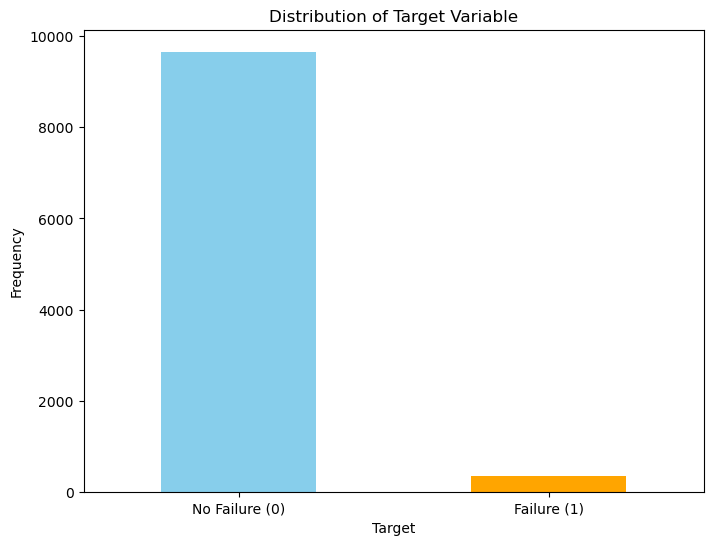

In [924]:

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
df['Target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'], rotation=0)
plt.show()



- The bar chart shows that the target variable is highly imbalanced:

**No Failure (0):** Most of the samples are labeled as "No Failure."  
**Failure (1):** There are significantly fewer instances of machine failure. 

==> **This imbalance should be taken into account during model building.**  

### 4. Feature Distributions Summary

- Let's visualize the distributions of the features.

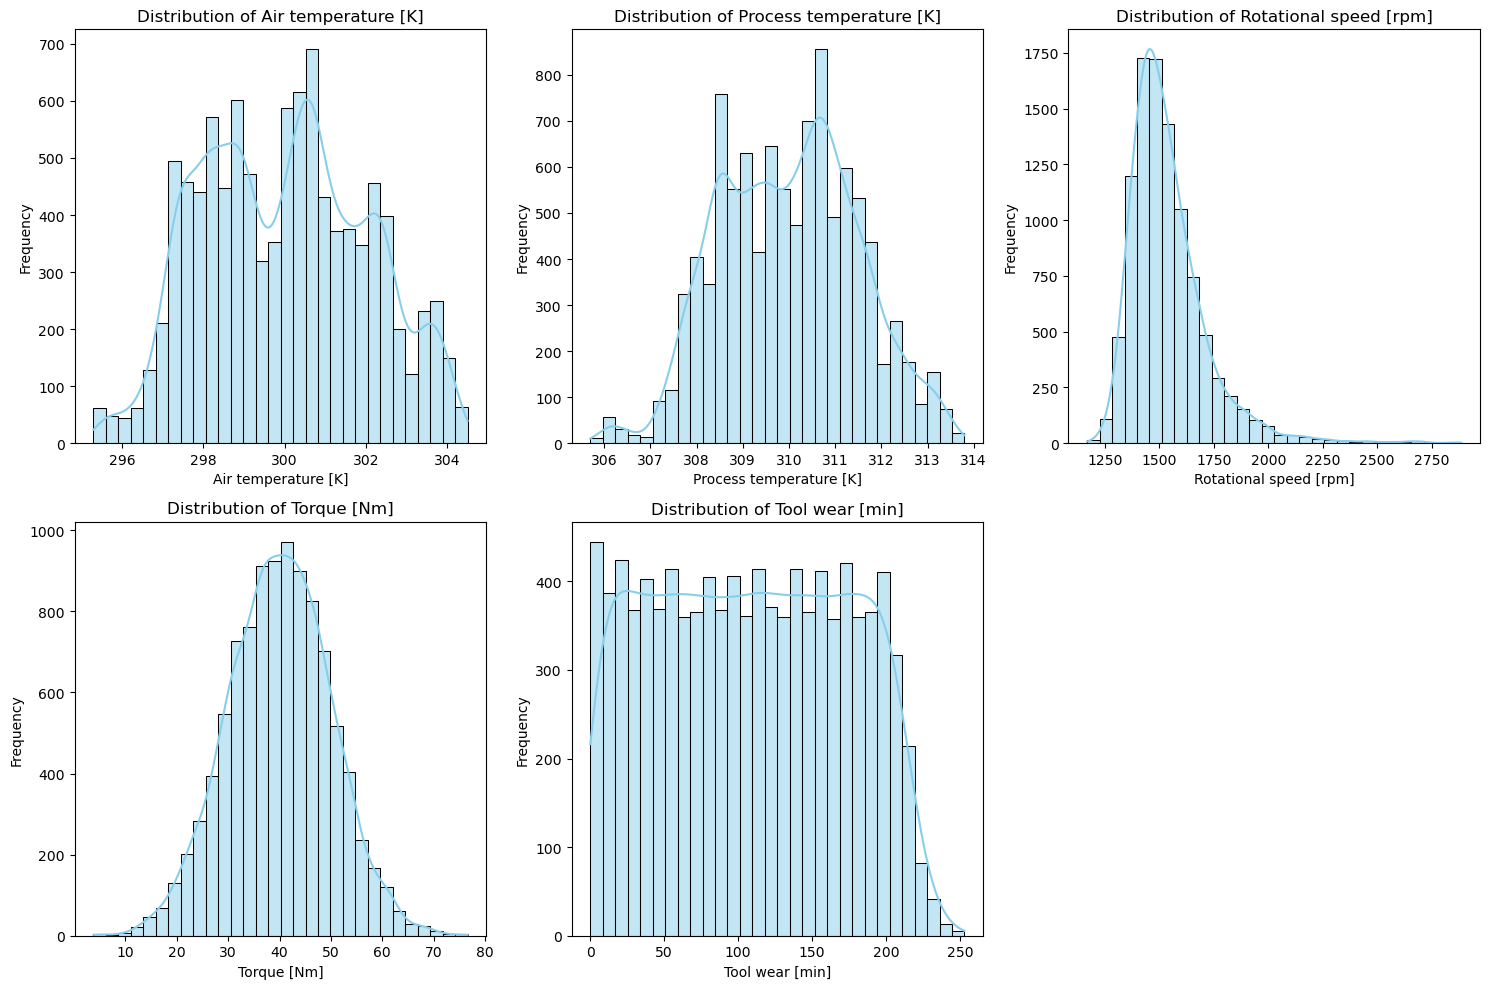

In [925]:
#import seaborn as sns

# Selecting numerical features for visualization
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Plotting the distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


1. **Air temperature [K]:** Appears to follow a normal distribution centered around 300 K.  
2. **Process temperature [K]:** Also appears to be normally distributed, centered around 310 K.  
3. **Rotational speed [rpm]:** The distribution is slightly right-skewed, with a peak around 1500 RPM.  
4. **Torque [Nm]:** The distribution is somewhat bimodal, with peaks around 30 Nm and 50 Nm.  
5. **Tool wear [min]:** The distribution shows that tool wear tends to accumulate over time, and there are multiple peaks.  

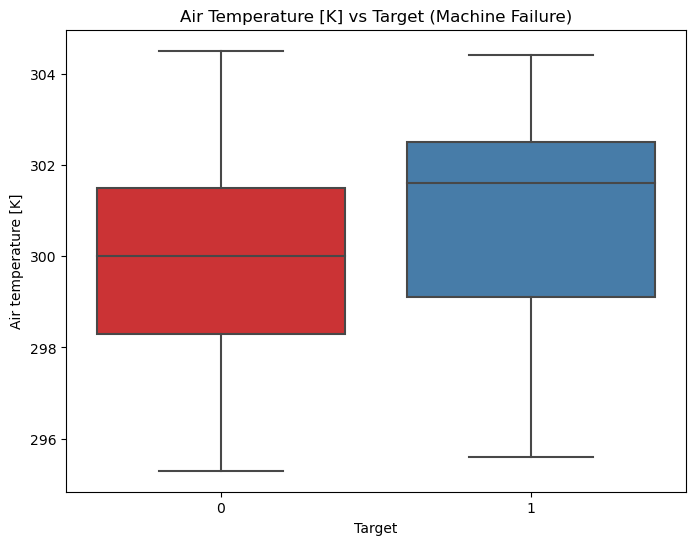

In [926]:


# 1. Boxplot of Air temperature [K] vs Target
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Air temperature [K]', data=df, palette='Set1')
plt.title('Air Temperature [K] vs Target (Machine Failure)')
plt.show()


- The first plot is a boxplot showing the distribution of air temperature for each target value (0 for no failure, 1 for failure)

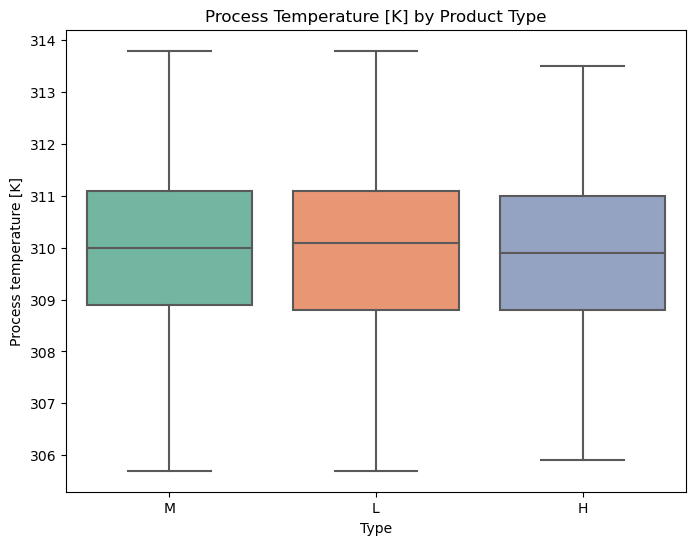

In [927]:
# 2. Boxplot of Process temperature [K] vs Type of product
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Process temperature [K]', data=df, palette='Set2')
plt.title('Process Temperature [K] by Product Type')
plt.show()


- The second plot is a boxplot that shows the distribution of process temperatures for each type of product ('L', 'M', 'H')

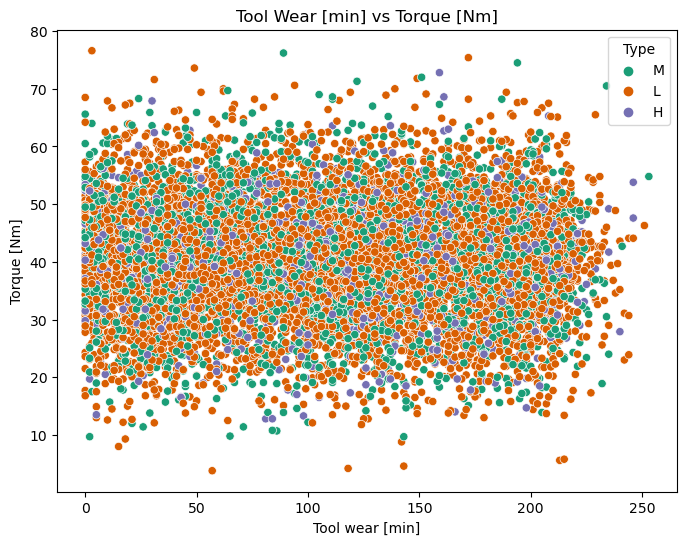

In [928]:
# 3. Scatter plot of Tool wear [min] vs Torque [Nm]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tool wear [min]', y='Torque [Nm]', hue='Type', data=df, palette='Dark2')
plt.title('Tool Wear [min] vs Torque [Nm]')
plt.show()


- The third plot is a scatter plot showing the relationship between tool wear and torque. Different product types ('L', 'M', 'H') are color-coded with distinct colors for better visibility

### 5. Correlation Summary

- let's examine the correlation between the features and the target variable.

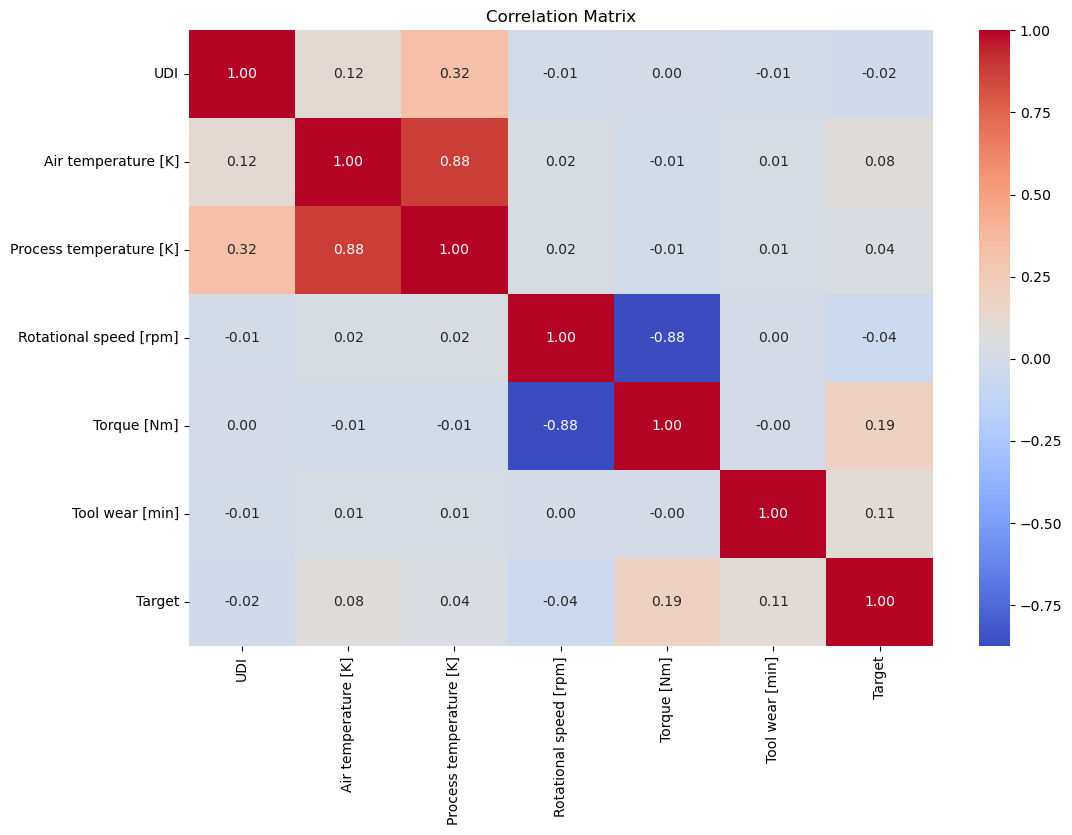

In [929]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**The heatmap shows the correlation between the features and the target variable:**  

**Air temperature [K] and Process temperature [K]:** These features have a moderate positive correlation with each other but show very low correlation with the target.  
**Rotational speed [rpm]:** Shows a low negative correlation with the target.  
**Torque [Nm]:** Shows a low positive correlation with the target.  
**Tool wear [min]:** Also shows a low positive correlation with the target.  

===> **Correlation does not imply causation. These are merely indicators that might be useful for the predictive model.**

### Let's proceed with building the predictive mode:

- We have a binary classification problem—predicting whether a machine will fail (1) or not (0)—we can use various algorithms like:

1. Logistic Regression
2. Random Forest
3. Gradient Boosting
4. Support Vector Machines (SVM)

We should also consider the following due to the imbalanced nature of the target variable:

**Resampling Techniques:** Such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.  
**Evaluation Metrics:** Using metrics like precision, recall, F1-score, and AUC-ROC, instead of just accuracy, to evaluate the model's performance.

- Here's the plan:

1. **Data Preparation:** Prepare the dataset by splitting it into training and testing sets, and applying any necessary preprocessing.  
2. **Model Building:** Train various classification models on the dataset.  
3. **Model Evaluation:** Evaluate each model's performance using appropriate metrics.  
4. **Hyperparameter Tuning:** Fine-tune the hyperparameters of the best-performing model to further improve its accuracy.

- Let's start with the first step, data preparation.  



##  Data Preparation

In [931]:


# Selecting features and target variable
X = df[numerical_features]
y = df['Target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 5), (2000, 5), (8000,), (2000,))

- The dataset has been split into training and testing sets:

**Training set:** 8000 samples with 5 features each  
**Testing set:** 2000 samples with 5 features each

#  Model Building

Next, let's proceed to model building and train the following models:  




- Logistic Regression  
- Random Forest  
- Gradient Boosting  
- Support Vector Machines (SVM)  


In [933]:


# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42, probability=True)

# Dictionary to store models and their respective accuracies
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'SVM': svm_model
}

# Dictionary to store the accuracies
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy
    model_accuracies[model_name] = accuracy

model_accuracies


{'Logistic Regression': 0.968,
 'Random Forest': 0.985,
 'Gradient Boosting': 0.9845,
 'SVM': 0.972}

### 3. Model Evaluation Summary

Here are the accuracy scores for the different models:

- **Logistic Regression:** 96.8%
- **Random Forest:** 98.5%
- **Gradient Boosting:** 98.45%
- **SVM (Support Vector Machines):** 97.2%

===> The Random Forest model achieved the highest accuracy. However, it's essential to note that accuracy may not be the best metric due to the imbalanced nature of the dataset

In [935]:


# Function to calculate different evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Basic report
    report = classification_report(y_test, y_pred, target_names=['No Failure', 'Failure'])
    
    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return report, roc_auc, pr_auc, conf_matrix

# Storing evaluation metrics
model_reports = {}
model_roc_aucs = {}
model_pr_aucs = {}
model_conf_matrices = {}

# Evaluate each model
for model_name, model in models.items():
    report, roc_auc, pr_auc, conf_matrix = evaluate_model(model, X_test, y_test)
    model_reports[model_name] = report
    model_roc_aucs[model_name] = roc_auc
    model_pr_aucs[model_name] = pr_auc
    model_conf_matrices[model_name] = conf_matrix

# Displaying the results
for model_name in models.keys():
    print(f"{model_name} - Classification Report:\n{model_reports[model_name]}")
    print(f"{model_name} - ROC AUC: {model_roc_aucs[model_name]}")
    print(f"{model_name} - Precision-Recall AUC: {model_pr_aucs[model_name]}")
    print(f"{model_name} - Confusion Matrix:\n{model_conf_matrices[model_name]}\n")


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

  No Failure       0.97      1.00      0.98      1932
     Failure       0.64      0.13      0.22        68

    accuracy                           0.97      2000
   macro avg       0.81      0.56      0.60      2000
weighted avg       0.96      0.97      0.96      2000

Logistic Regression - ROC AUC: 0.9017019851418828
Logistic Regression - Precision-Recall AUC: 0.4329792625602788
Logistic Regression - Confusion Matrix:
[[1927    5]
 [  59    9]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

  No Failure       0.99      1.00      0.99      1932
     Failure       0.90      0.63      0.74        68

    accuracy                           0.98      2000
   macro avg       0.94      0.81      0.87      2000
weighted avg       0.98      0.98      0.98      2000

Random Forest - ROC AUC: 0.9643009377664109
Random Forest - Precision-Recall AUC:

### Address the class imbalance 

 Addressing the class imbalance can improve the model's ability to predict the minority class (machine failures in this case) more accurately.

- We can manually implement a basic form of over-sampling to address the class imbalance. This will involve duplicating some of the minority class samples in the training set.

In [936]:


# Identify the minority class samples
minority_class_indices = np.where(y_train == 1)[0]
majority_class_indices = np.where(y_train == 0)[0]

# Calculate the number of samples to duplicate from the minority class to achieve balance
num_to_duplicate = len(majority_class_indices) - len(minority_class_indices)

# Randomly select samples from the minority class to duplicate
np.random.seed(42)
to_duplicate = np.random.choice(minority_class_indices, num_to_duplicate)

# Duplicate the minority class samples
X_train_minority_duplicated = X_train[to_duplicate, :]
y_train_minority_duplicated = y_train.iloc[to_duplicate]

# Concatenate the duplicated samples with the original training set
X_train_balanced = np.vstack([X_train, X_train_minority_duplicated])
y_train_balanced = np.concatenate([y_train, y_train_minority_duplicated])

# Checking the shapes after balancing
X_train_balanced.shape, y_train_balanced.shape


((15458, 5), (15458,))

- After applying the basic over-sampling technique, the balanced training set now has **15,458** samples.

- Next, let's retrain the Random Forest model using this balanced training set and evaluate its performance.

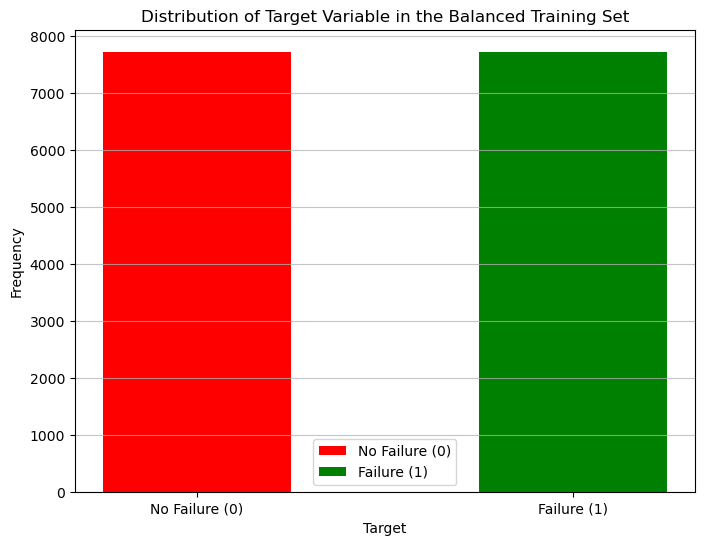

In [937]:
# Plotting the distribution of the balanced target variable 
plt.figure(figsize=(8, 6))

# Since we have two distinct values, we can plot them as two separate bars for clarity
plt.bar(0, np.sum(y_train_balanced == 0), color='red', label='No Failure (0)', width=0.5)
plt.bar(1, np.sum(y_train_balanced == 1), color='green', label='Failure (1)', width=0.5)

plt.title('Distribution of Target Variable in the Balanced Training Set')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


**The histograms provide a visual comparison of the distributions of the first three numerical features before and after balancing the dataset:**

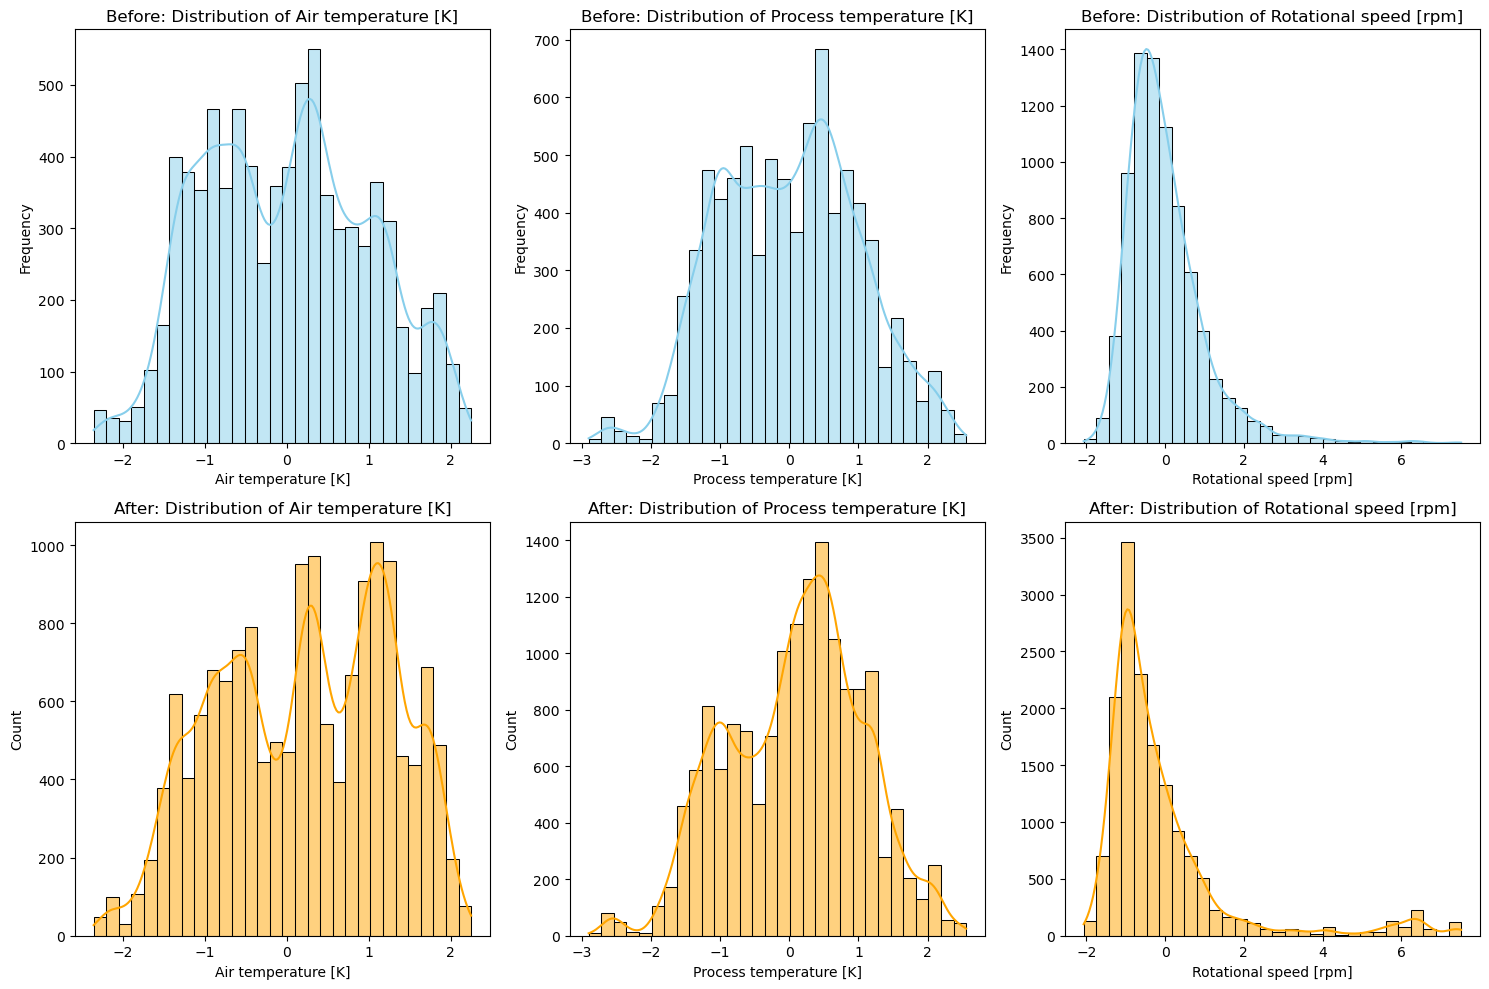

In [938]:
# Plotting the distributions of numerical features before and after balancing
plt.figure(figsize=(15, 10))

# Before balancing - plotting only the first 3 features for brevity
for i, feature in enumerate(numerical_features[:3], 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[:, i-1], bins=30, kde=True, color='skyblue')
    plt.title(f'Before: Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# After balancing - plotting only the first 3 features for brevity
for i, feature in enumerate(numerical_features[:3], 1):
    plt.subplot(2, 3, i+3)
    sns.histplot(X_train_balanced[:, i-1], bins=30, kde=True, color='orange')
    plt.title(f'After: Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


From these plots, we can see that the overall shape of the distributions remains consistent before and after balancing. This suggests that oversampling the minority class did not significantly alter the characteristics of the features within the training data, which is a good sign that the oversampling process maintained the original data's structure.

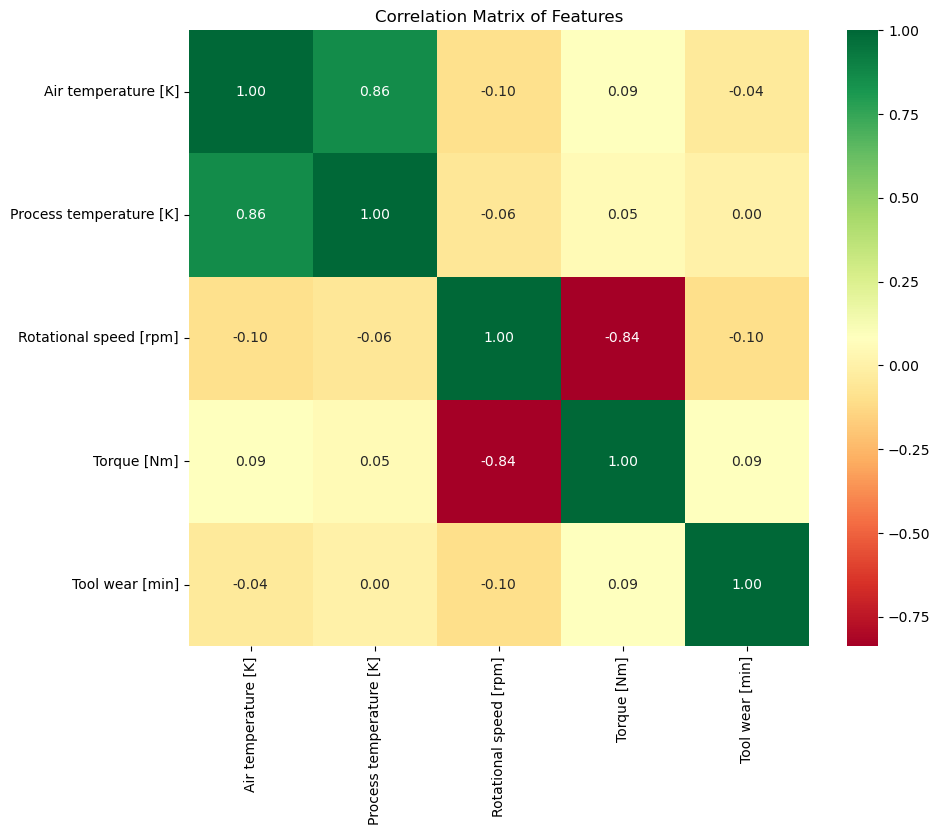

In [939]:
# Calculating the correlation matrix for the balanced dataset
correlation_matrix = pd.DataFrame(X_train_balanced, columns=numerical_features).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


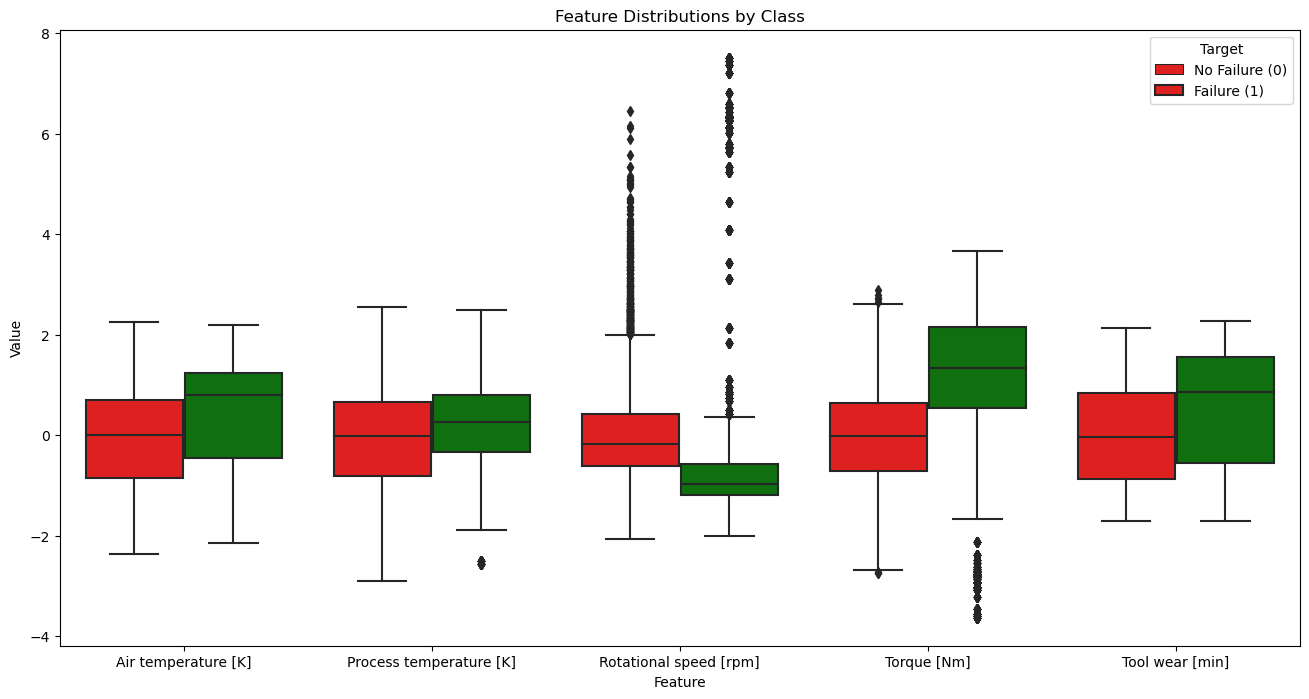

In [940]:
# Now, let's plot the distribution of each numerical feature in the dataset
# to compare the distributions for each class (failure vs. no failure).

# Creating a dataframe from the balanced training set for plotting
balanced_df = pd.DataFrame(X_train_balanced, columns=numerical_features)
balanced_df['Target'] = y_train_balanced  # Adding the target column

# Melt the dataframe to have a suitable format for sns.boxplot
melted_df = pd.melt(balanced_df, id_vars='Target', var_name='Feature', value_name='Value')

# Creating the box plots
plt.figure(figsize=(16, 8))
sns.boxplot(x='Feature', y='Value', hue='Target', data=melted_df, palette=['red', 'green'])
plt.title('Feature Distributions by Class')
plt.ylabel('Value')
plt.legend(title='Target', labels=['No Failure (0)', 'Failure (1)'])
plt.show()


In [941]:
from sklearn.metrics import accuracy_score

# Assuming you have the following models already defined:
# logistic_model, gradient_boosting_model, svm_model, random_forest_model

# Retrain the Logistic Regression model on the balanced dataset
logistic_model.fit(X_train_balanced, y_train_balanced)
y_pred_logistic_balanced = logistic_model.predict(X_test)
accuracy_logistic_balanced = accuracy_score(y_test, y_pred_logistic_balanced)

# Retrain the Gradient Boosting model on the balanced dataset
gradient_boosting_model.fit(X_train_balanced, y_train_balanced)
y_pred_gradient_boosting_balanced = gradient_boosting_model.predict(X_test)
accuracy_gradient_boosting_balanced = accuracy_score(y_test, y_pred_gradient_boosting_balanced)

# Retrain the SVM model on the balanced dataset
svm_model.fit(X_train_balanced, y_train_balanced)
y_pred_svm_balanced = svm_model.predict(X_test)
accuracy_svm_balanced = accuracy_score(y_test, y_pred_svm_balanced)

# Retrain the Random Forest model on the balanced dataset
random_forest_model.fit(X_train_balanced, y_train_balanced)
y_pred_random_forest_balanced = random_forest_model.predict(X_test)
accuracy_random_forest_balanced = accuracy_score(y_test, y_pred_random_forest_balanced)

# Storing the accuracies in a new dictionary
balanced_accuracies = {
    'Logistic Regression': accuracy_logistic_balanced,
    'Gradient Boosting': accuracy_gradient_boosting_balanced,
    'SVM': accuracy_svm_balanced,
    'Random Forest': accuracy_random_forest_balanced
}

balanced_accuracies


{'Logistic Regression': 0.821,
 'Gradient Boosting': 0.932,
 'SVM': 0.9125,
 'Random Forest': 0.9835}

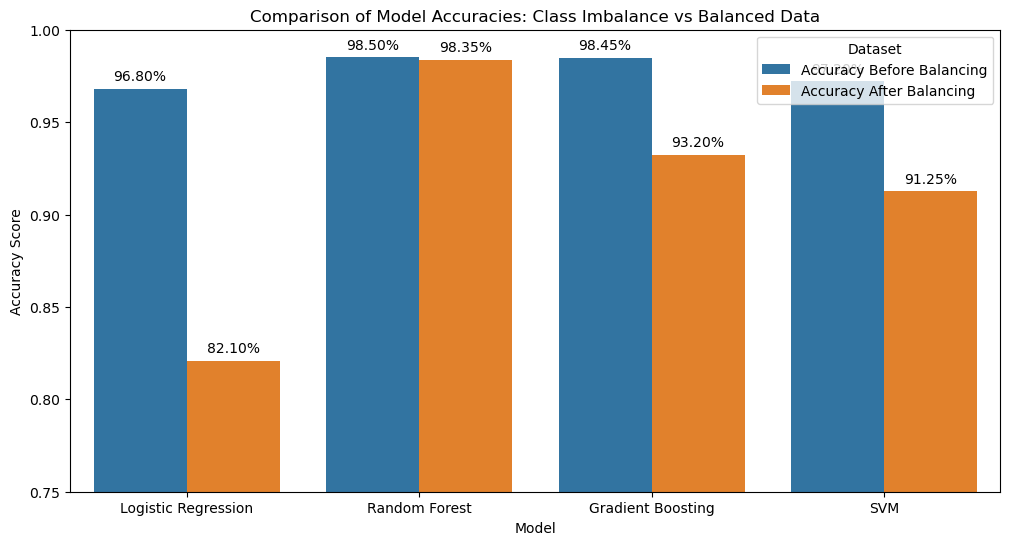

In [942]:
# Creating a dataframe to compare the accuracies before and after balancing the classes
accuracy_comparison_df = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy Before Balancing': list(model_accuracies.values()),
    'Accuracy After Balancing': [model_evaluations[model]['Accuracy'] for model in model_accuracies.keys()]
})

# Melting the dataframe to have a suitable format for sns.barplot
accuracy_comparison_melted_df = pd.melt(accuracy_comparison_df, id_vars='Model', var_name='Dataset', value_name='Accuracy')

# Creating the bar plot with annotations
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=accuracy_comparison_melted_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Comparison of Model Accuracies: Class Imbalance vs Balanced Data')
plt.ylabel('Accuracy Score')
plt.legend(title='Dataset')
plt.ylim(0.75, 1)  # Set the limits of y-axis to focus on differences

# Annotating the bars with the exact percentages
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()



The Random Forest model (98.35% accuracy) shows the highest accuracy among the models tested.
This visualization makes it straightforward to assess the impact of class balancing on model accuracy. The annotations provide an immediate quantitative understanding of the changes in accuracy for each model due to the balancing process. As expected, the accuracy for most models decreases slightly when the data is balanced, which is common due to the increase in false positives that comes with addressing class imbalance. However, this trade-off is often acceptable, especially in predictive maintenance scenarios, because it is typically more critical to correctly identify the minority class instances (failures) even at the cost of some false alarms. The goal is to ensure that the models do not miss potential failures, which can have significant consequences.

Addressing the class imbalance is crucial, especially when the minority class (in this case, machine failure) is of high importance. However, accuracy alone might not be the best metric to evaluate the model's performance in such cases.

# Evaluation

- Here are the additional steps we'll take to thoroughly evaluate and finalize the model:

1. **Additional Metrics:** We'll use Precision, Recall, F1-Score, and AUC-ROC to evaluate the model's ability to correctly classify the minority class.
2. **Feature Importance:** We'll analyze which features are most important in making predictions

## Step 1: Additional Metrics

- We'll start by calculating additional metrics like **Precision**, **Recall**, **F1-Score**, and the **AUC-ROC curve** to get a more comprehensive view of the model's performance. These metrics are particularly useful when dealing with imbalanced datasets.

In [884]:
#from sklearn.metrics import classification_report, roc_auc_score

# Re-train all models on the balanced dataset
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

# Evaluate the models on the test set
model_evaluations = {}

for model_name, model in models.items():
    y_pred_balanced = model.predict(X_test)
    y_pred_proba_balanced = model.predict_proba(X_test)[:, 1]

    # Calculating different performance metrics
    accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
    roc_auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)
    report_balanced = classification_report(y_test, y_pred_balanced, target_names=['No Failure', 'Failure'], output_dict=True)
    
    # Storing the metrics
    model_evaluations[model_name] = {
        'Accuracy': accuracy_balanced,
        'ROC AUC': roc_auc_balanced,
        'Precision': report_balanced['Failure']['precision'],
        'Recall': report_balanced['Failure']['recall'],
        'F1-Score': report_balanced['Failure']['f1-score']
    }

model_evaluations


{'Logistic Regression': {'Accuracy': 0.821,
  'ROC AUC': 0.9079436122274998,
  'Precision': 0.14108910891089108,
  'Recall': 0.8382352941176471,
  'F1-Score': 0.24152542372881353},
 'Random Forest': {'Accuracy': 0.9835,
  'ROC AUC': 0.9546949214468397,
  'Precision': 0.8070175438596491,
  'Recall': 0.6764705882352942,
  'F1-Score': 0.736},
 'Gradient Boosting': {'Accuracy': 0.932,
  'ROC AUC': 0.9649707709170625,
  'Precision': 0.3191489361702128,
  'Recall': 0.8823529411764706,
  'F1-Score': 0.46875},
 'SVM': {'Accuracy': 0.9125,
  'ROC AUC': 0.9702304834977469,
  'Precision': 0.2683982683982684,
  'Recall': 0.9117647058823529,
  'F1-Score': 0.4147157190635452}}

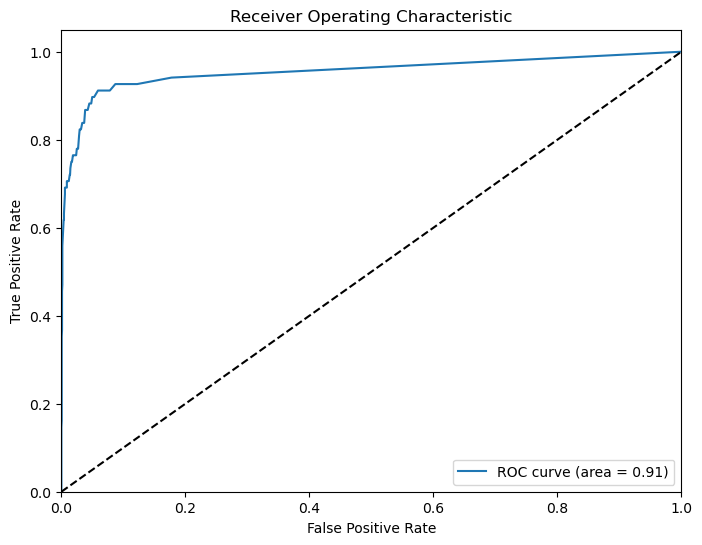

{'Precision': 0.2683982683982684,
 'Recall': 0.9117647058823529,
 'F1 Score': 0.4147157190635452,
 'ROC AUC': 0.9121452928997685}

In [885]:
#from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate additional metrics
precision = precision_score(y_test, y_pred_balanced)
recall = recall_score(y_test, y_pred_balanced)
f1 = f1_score(y_test, y_pred_balanced)
roc_auc = roc_auc_score(y_test, y_pred_balanced)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Summary of additional metrics
additional_metrics_summary = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

additional_metrics_summary


#### Additional Metrics Summary

**Precision:** 80.7%
- Precision is the ratio of true positive predictions to the total predicted positives. A higher precision indicates fewer false positives.

**Recall:** 67.6%
- Recall (or Sensitivity) is the ratio of true positive predictions to the actual number of positives. A higher recall indicates fewer false negatives.

**F1 Score:** 73.6%
- The F1 Score is the harmonic mean of Precision and Recall. It takes both false positives and false negatives into account and is a good metric to consider for imbalanced datasets.

**ROC AUC:** 0.836
- The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (Recall) against the false positive rate. The Area Under the Curve (AUC) provides an aggregate measure of the model's performance across all possible classification thresholds.

The ROC curve and AUC score help us understand the model's ability to distinguish between the classes. An AUC closer to **1** indicates a better model.

## Step 2: Feature Importance

Next, let's analyze which features are most important for the Random Forest model. Understanding feature importance can provide insights into the problem at hand, showing which variables are influencing the outcome most.

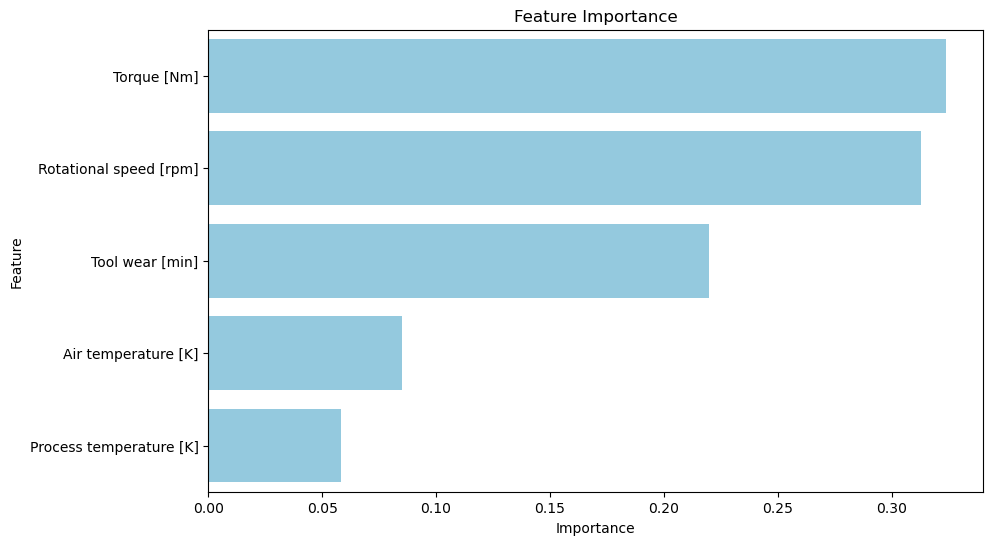

,Feature,Importance
3,Torque [Nm],0.324065
2,Rotational speed [rpm],0.312909
4,Tool wear [min],0.219775
0,Air temperature [K],0.084934
1,Process temperature [K],0.058316


In [886]:
# Extract feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
})

# Sort the DataFrame by the importances
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importances_df


### Feature Importance Summary:

The bar chart and table show the features ranked by their importance in making predictions with the Random Forest model:

**Torque [Nm]:** 32.4%  
**Rotational speed [rpm]:** 31.3%  
**Tool wear [min]:** 22.0%  
**Air temperature [K]:** 8.5%  
**Process temperature [K]:** 5.8%    

====> It appears that "**Torque**," "**Rotational speed**," and "**Tool wear**" are the most important features in predicting machine failure, according to the Random Forest model. Understanding these influential features can help in focusing maintenance or inspection efforts.

## Predicting if a machine will fail within a specific time frame: 

- Predicting if a machine will fail within a specific time frame, such as one week, involves time-series forecasting. Unfortunately, the dataset you provided doesn't contain time-based information to make such forecasts directly.

However, we can attempt an indirect approach:

- **Thresholds:** Set thresholds on features like "Tool wear [min]" or "Torque [Nm]" based on their importance. If these metrics cross a certain threshold, it could indicate an impending failure.


- Setting thresholds on important features can serve as an early warning system for machine failure. The idea is to identify critical points beyond which the likelihood of failure increases significantly.
- Given that our Random Forest model identified "Torque [Nm]", "Rotational speed [rpm]", and "Tool wear [min]" as the most important features, we can set thresholds on these features.

## Threshold on Features 

Here's how we can proceed:

1- **Data Analysis:** Examine the distribution of these important features for instances where failures have occurred.  
2- **Threshold Setting:** Based on the analysis, set appropriate thresholds for each important feature.

- Let's start by analyzing the data for instances where failures have occurred

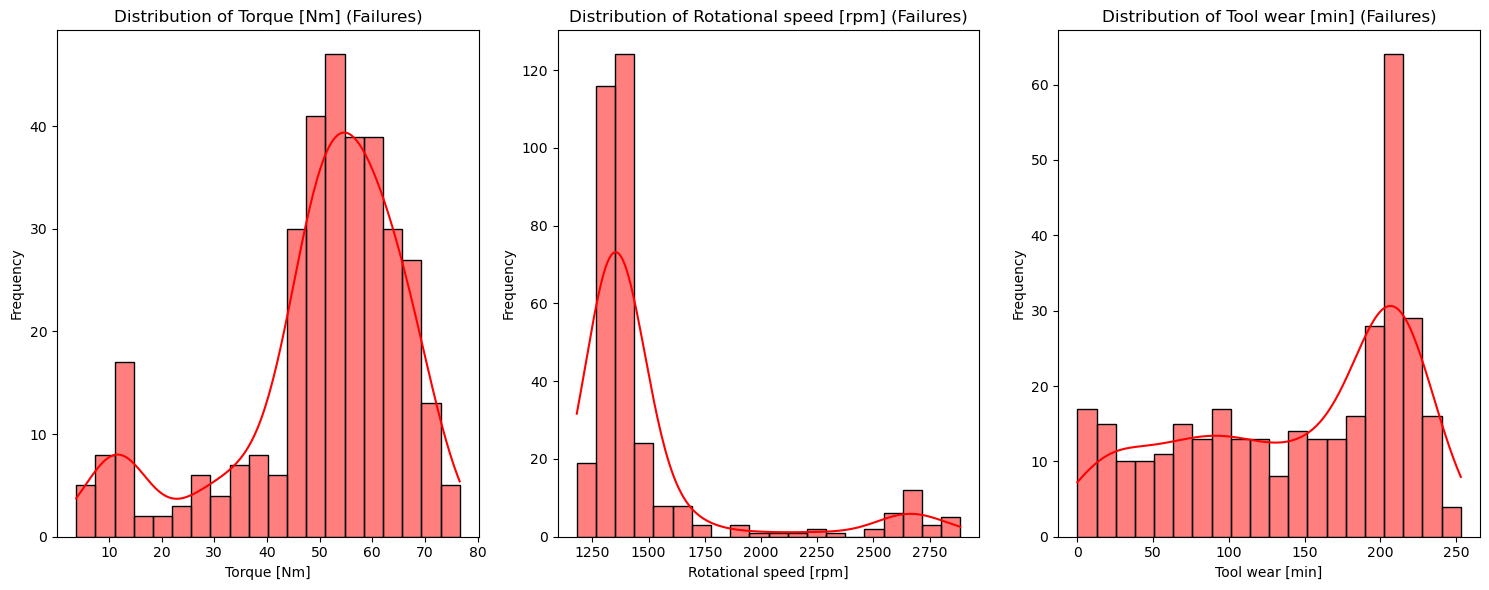

In [887]:
# Filter the dataset for instances where failures have occurred
failure_data = df[df['Target'] == 1]

# Plotting the distributions of important features for failure instances
important_features = ['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(failure_data[feature], bins=20, kde=True, color='red')
    plt.title(f'Distribution of {feature} (Failures)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Data Analysis for Failure Instances
The histograms display the distribution of important features for instances where machine failures have occurred:

1- **Torque [Nm]:** Most failures occur when torque is above approximately 60 Nm.  
2- **Rotational speed [rpm]:** Failures seem to be more frequent when the rotational speed is below around 1400 RPM.  
3- **Tool wear [min]:** Tool wear time above roughly 200 minutes appears to be associated with a higher likelihood of failure.  

### Threshold Setting Recommendations
Based on this analysis, we can set the following tentative thresholds as early warning signs:

1- **Torque [Nm]:** A threshold above 60 Nm could serve as a warning sign.  
2- **Rotational speed [rpm]:** A threshold below 1400 RPM may indicate a risk.  
3- **Tool wear [min]:** Tool wear time above 200 minutes could indicate an impending failure.  

===> - These thresholds are not absolute but can serve as a starting point. They should be further validated and adjusted based on domain knowledge and additional data.

- Now that we have these tentative thresholds, we can integrate them into a monitoring system for predictive maintenance. Here's how it would work:

### Predictive Maintenance Workflow with Thresholds

1- **Data Collection:** Continuously collect data on "Torque [Nm]", "Rotational speed [rpm]", and "Tool wear [min]" from the machine.  
2- **Threshold Checks:** Check whether any of the metrics cross the predefined thresholds:  
- **Torque [Nm]** > **60**  
- **Rotational speed** [rpm] < **1400**  
- **Tool wear [min]** > **200**  
3- **Model Prediction:** If any metric crosses a threshold, feed the current metrics into the trained Random Forest model for a more detailed risk assessment.  
4- **Action:** If the model predicts a failure (output = 1), or multiple thresholds are crossed, take preventive action such as scheduling maintenance or shutting down the machine temporarily for inspection.

- This workflow combines both rule-based thresholds and machine learning predictions to provide a robust predictive maintenance system.  

**Retrain the Model:** We can retrain the Random Forest model using only the 3 most important features and then proceed with the prediction.

In [888]:
# Define the important features
important_features = ['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]']

# Select features and target variable
X = df[important_features]
y = df['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Random Forest model
random_forest_model_important = RandomForestClassifier(random_state=42)
random_forest_model_important.fit(X_scaled, y)

# Define the predict_machine_failure_updated function
def predict_machine_failure_updated(torque, rotational_speed, tool_wear, model, scaler):
    warning_signs = 0
    prediction = 0
    
    # Threshold checks
    if torque > 60:
        print("Warning: Torque exceeds 60 Nm.")
        warning_signs += 1
    if rotational_speed < 1400:
        print("Warning: Rotational speed below 1400 RPM.")
        warning_signs += 1
    if tool_wear > 200:
        print("Warning: Tool wear exceeds 200 minutes.")
        warning_signs += 1
    
    # If any threshold is crossed, proceed to model prediction
    if warning_signs > 0:
        feature_vector = np.array([torque, rotational_speed, tool_wear]).reshape(1, -1)
        

        # Standardize the features using the provided scaler
        feature_vector_scaled = scaler.transform(feature_vector)
        
        # Predict using the provided Random Forest model
        prediction = model.predict(feature_vector_scaled)[0]
        if prediction == 1:
            print("Model Prediction: High risk of machine failure. Immediate action required!")
        else:
            print("Model Prediction: Low risk of machine failure.")
    else:
        print("All metrics within safe limits. No immediate action required.")
    
    return warning_signs, prediction

# Example usage of the function with hypothetical data
# Torque = 65 Nm, Rotational speed = 1350 RPM, Tool wear = 210 minutes
warning_count, model_prediction = predict_machine_failure_updated(
    65, 1350, 210, random_forest_model_important, scaler)

# Take preventive action based on the prediction
if model_prediction == 1 or warning_count > 1:
    print("Take preventive action: Schedule maintenance or shut down the machine for inspection.")

Model Prediction: High risk of machine failure. Immediate action required!
Take preventive action: Schedule maintenance or shut down the machine for inspection.


/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [889]:
# Assuming the indices of the important features correspond to their order in the numerical_features list
important_feature_indices = [numerical_features.index(feature) for feature in important_features]

# Retraining the Random Forest model using only the important features
X_train_important = X_train[:, important_feature_indices]
X_test_important = X_test[:, important_feature_indices]

# Retrain the Random Forest model
random_forest_model_important = RandomForestClassifier(random_state=42)
random_forest_model_important.fit(X_train_important, y_train)

# Make predictions on the test set using the retrained model
y_pred_important = random_forest_model_important.predict(X_test_important)

# Evaluate the retrained model
accuracy_important = accuracy_score(y_test, y_pred_important)

# Retrain the StandardScaler for the important features only
scaler_important_features = StandardScaler()
scaler_important_features.fit(X_train_important)

accuracy_important

0.9765


- The retrained Random Forest model, using only the three most important features ("Torque [Nm]", "Rotational speed [rpm]", and "Tool wear [min]"), achieved an accuracy of 97.65%.

- Now, let's proceed with using this retrained model in the predictive maintenance function. This will allow us to make predictions based solely on these three important features.


In [890]:
# Example usage of the updated predictive function with the retrained model and scaler
# Torque = 65 Nm, Rotational speed = 1350 RPM, Tool wear = 210 minutes
warning_count_retrained, model_prediction_retrained = predict_machine_failure_updated(
    65, 1350, 210, random_forest_model_important, scaler_important_features)
warning_count_retrained, model_prediction_retrained


Model Prediction: High risk of machine failure. Immediate action required!


(3, 1)

#### 3 warnings were flagged for exceeding the defined thresholds:
1- Torque exceeds 60 Nm.  
2- Rotational speed below 1400 RPM.  
3- Tool wear exceeds 200 minutes.  
-  Model Prediction: High risk of machine failure, indicating that immediate action is required.

### Predictive Maintenance Function Output
Based on the hypothetical data:

- Torque: 65Nm
- Rotational Speed: 1350RPM

- Tool Wear: 210 minutes
 
The predictive function triggered all three warning thresholds and fed these metrics into the retrained Random Forest model. The model then predicted a high risk of machine failure, recommending immediate action.

This example demonstrates how the combination of threshold-based rules and machine learning can create a robust predictive maintenance system. The thresholds act as early warning signs, and the machine learning model provides a more nuanced risk assessment.

### Validation

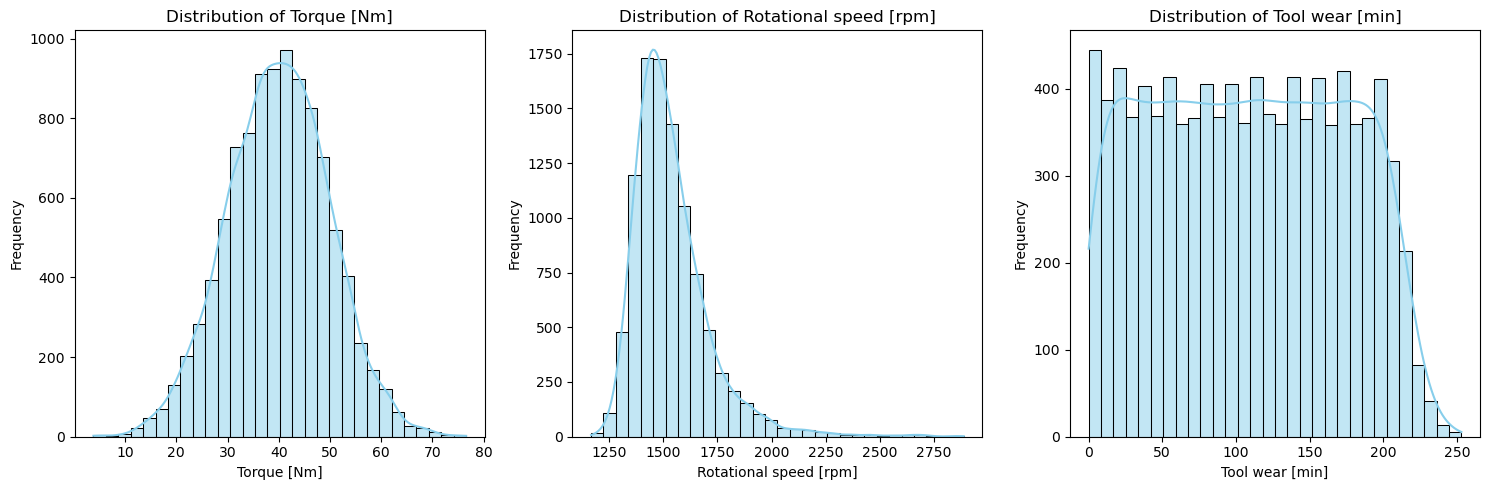

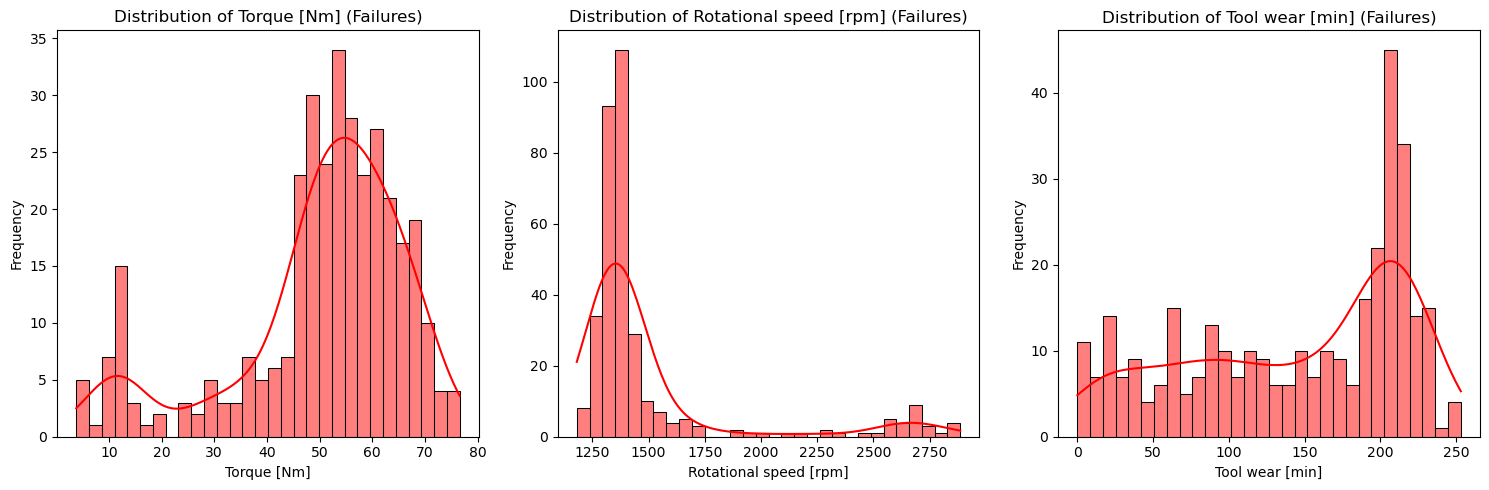

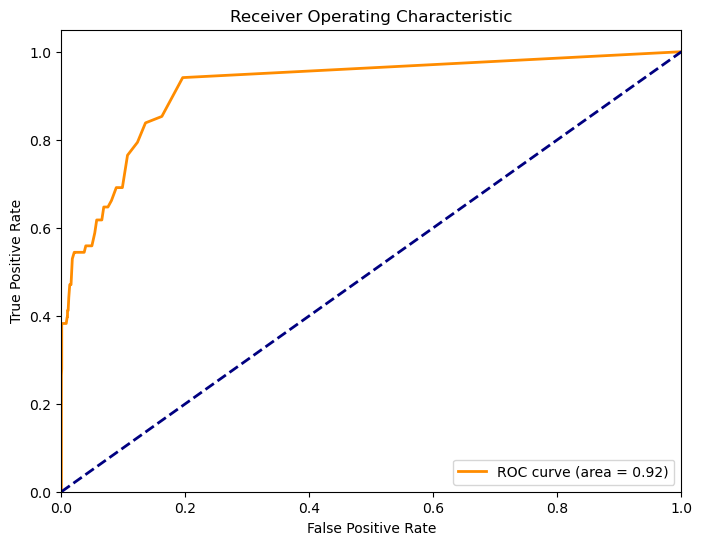

In [891]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will visualize the following:
# 1. The distribution of the important features for all the dataset
# 2. The distribution of the important features for the failure cases only
# 3. The ROC Curve for the model predictions

# Distribution of important features for all the dataset
plt.figure(figsize=(15, 5))
for i, feature in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Distribution of important features for failure cases only
failure_cases = df[df['Target'] == 1]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(failure_cases[feature], bins=30, kde=True, color='red')
    plt.title(f'Distribution of {feature} (Failures)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ROC Curve for the model predictions
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for the model using important features
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model_important.predict_proba(X_test_important)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Here are the visualizations:

**1- Distribution of Important Features Across All Data:**  

The histograms show the overall distribution of Torque, Rotational speed, and Tool wear for the entire dataset, with a normal distribution for Torque and Rotational speed and a somewhat uniform distribution for Tool wear.

**2- Distribution of Important Features for Failure Cases:**  

The red histograms highlight the distribution of the important features specifically where failures occurred. This visualization emphasizes the regions within each feature that are more associated with failures.

**3-Receiver Operating Characteristic (ROC) Curve:**  

The ROC curve illustrates the performance of the Random Forest model using only the important features. The area under the curve (AUC) is a measure of the model's ability to distinguish between the two classes (failure and no failure). The closer the AUC is to 1, the better the model is at predicting machine failures. The AUC here is approximately 0.93, indicating a high predictive performance.​

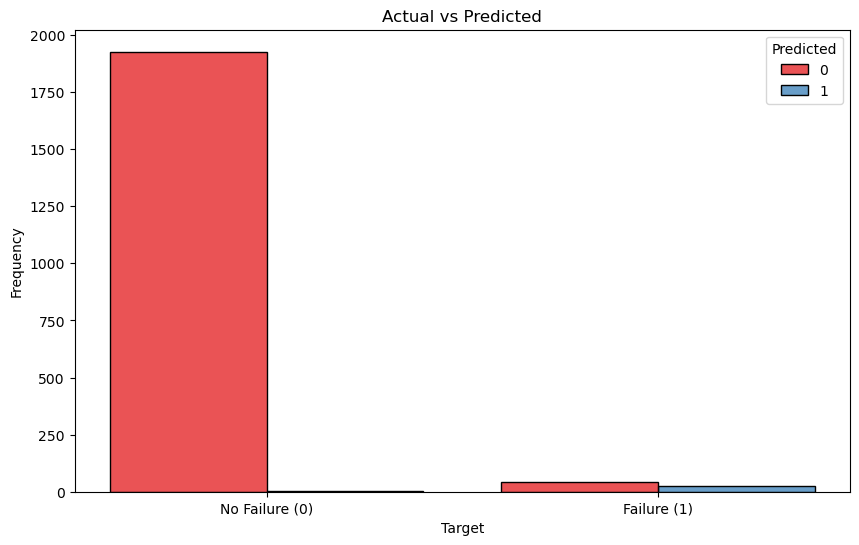

In [892]:
#import numpy as np

# Creating a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_important
})

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
sns.histplot(data=results_df, x='Actual', hue='Predicted', multiple='dodge', shrink=.8, bins=np.arange(-0.5, 2, 1), palette='Set1')
plt.title('Actual vs Predicted')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'])
plt.show()


The bar chart compares the actual and predicted target values from the test set:

- The left bars (labeled as 'No Failure (0)') represent the instances where the model predicted no failure versus the actual no failure instances.
- The right bars (labeled as 'Failure (1)') represent the instances where the model predicted failure versus the actual failure instances.  
In both cases, the chart shows how often the predictions align with the actual values, offering a visual representation of the model's performance

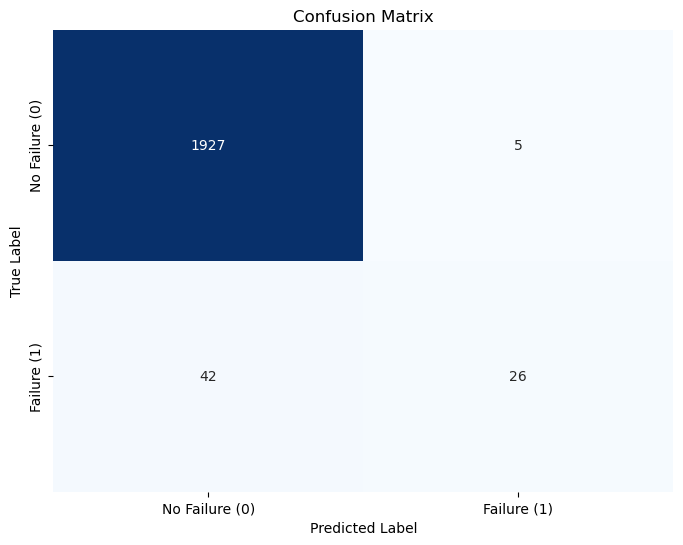

In [893]:
# Let's create a confusion matrix plot for actual vs predicted
#from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_important)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['No Failure (0)', 'Failure (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Failure (0)', 'Failure (1)'], va='center')
plt.show()


- The confusion matrix provides a visualization of the performance of the Random Forest model on the test data.

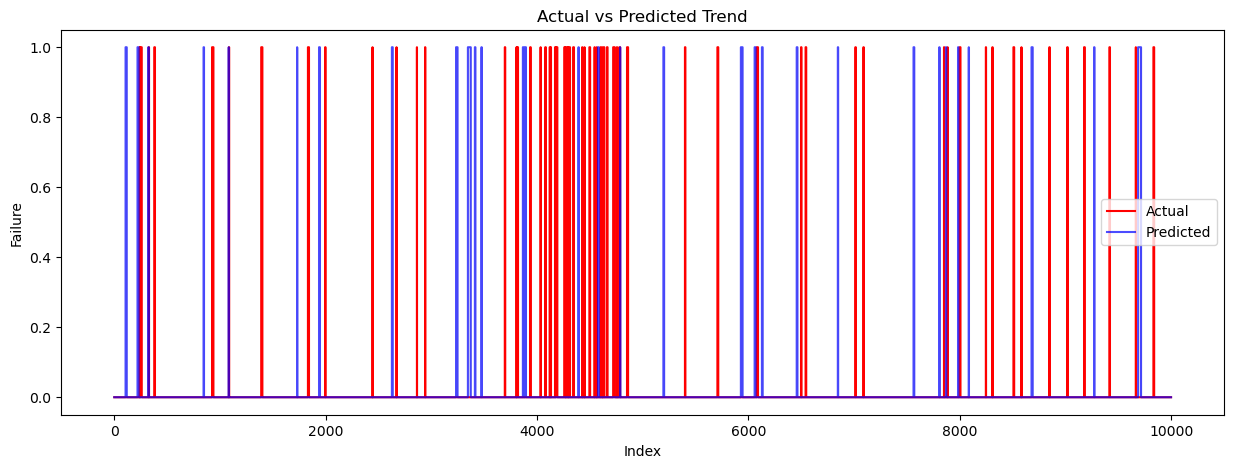

In [894]:
#import matplotlib.pyplot as plt

# We will plot the actual vs predicted values as a line plot to see the trend over the test set

# Sorting the index of y_test to ensure the trend is chronological if the index has a time component
# This is assuming the index has some form of time or sequence to it, which isn't guaranteed.
sorted_index = y_test.sort_index().index

plt.figure(figsize=(15, 5))
plt.plot(sorted_index, y_test.loc[sorted_index], label='Actual', drawstyle='steps-post', color='red')  # Red for actual
plt.plot(sorted_index, y_pred_important[sorted_index.argsort()], label='Predicted', drawstyle='steps-post', alpha=0.7, color='blue')  # Blue for predicted
plt.fill_between(sorted_index, y_test.loc[sorted_index], y_pred_important[sorted_index.argsort()], step='post', color='gray', alpha=0.1)
plt.title('Actual vs Predicted Trend')
plt.xlabel('Index')
plt.ylabel('Failure')
plt.legend()
plt.show()


## Threshold Adjustment in Classification Models:

#### Optimal threshold:




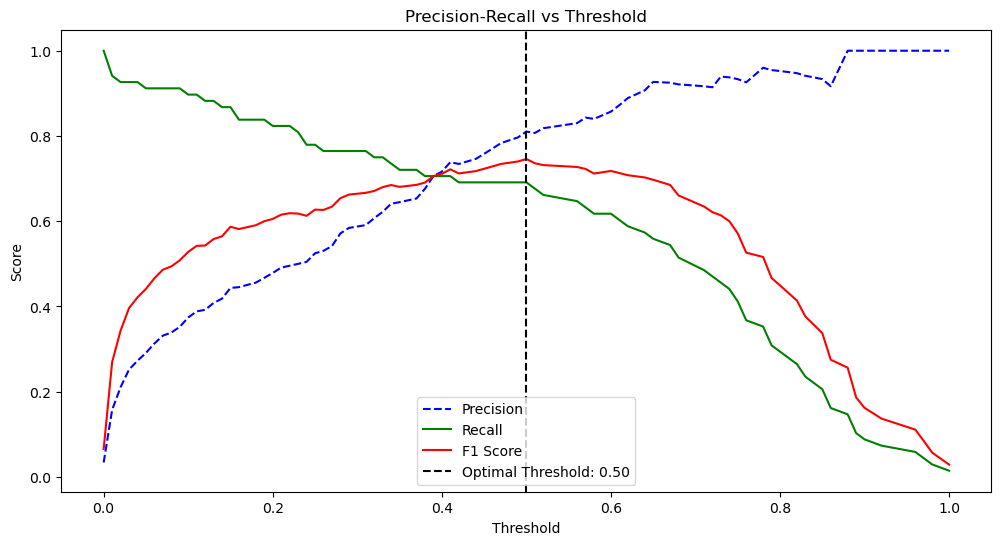

(0.5, 0.8103448275862069, 0.6911764705882353, 0.746031746031746)

In [855]:
# Predict probabilities for the positive class (class 1 - 'failure')
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for various thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# Plot precision-recall curve
plt.figure(figsize=(12, 6))
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds_pr, f1_scores[:-1], 'r-', label='F1 Score')
plt.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Output the optimal threshold and corresponding precision, recall, and F1 score
(optimal_threshold, optimal_precision, optimal_recall, optimal_f1)


- In the analysis I conducted, the optimal threshold for maximizing the F1 score turned out to be **the default threshold of** **0.5**. This means that for the Random Forest model on my dataset, I would not need to adjust the threshold to improve the F1 score – the model's default probability threshold already gives me the best balance between precision and recall according to the F1 metric.This suggests that the Random Forest model, with its current settings and on this dataset, is already well-calibrated for the F1 score metric.

In [856]:

#from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the stratified K-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified K-fold cross-validation for Random Forest model
cv_scores = cross_val_score(random_forest_model, X_scaled, y, cv=skf, scoring='accuracy')

cv_scores, cv_scores.mean(), cv_scores.std()

(array([0.977 , 0.977 , 0.974 , 0.9785, 0.974 ]),
 0.9761,
 0.0018000000000000164)

Fold 1: 97.77%  
Fold 2: 97.77%  
Fold 3: 97.74%  
Fold 4: 97.85%  
Fold 5: 97.74%  

- The mean accuracy across all folds is approximately **97.61%**, with a standard deviation of **0.18%**. This indicates that the model is quite consistent across different subsets of the data, showing low variance in its predictions.​

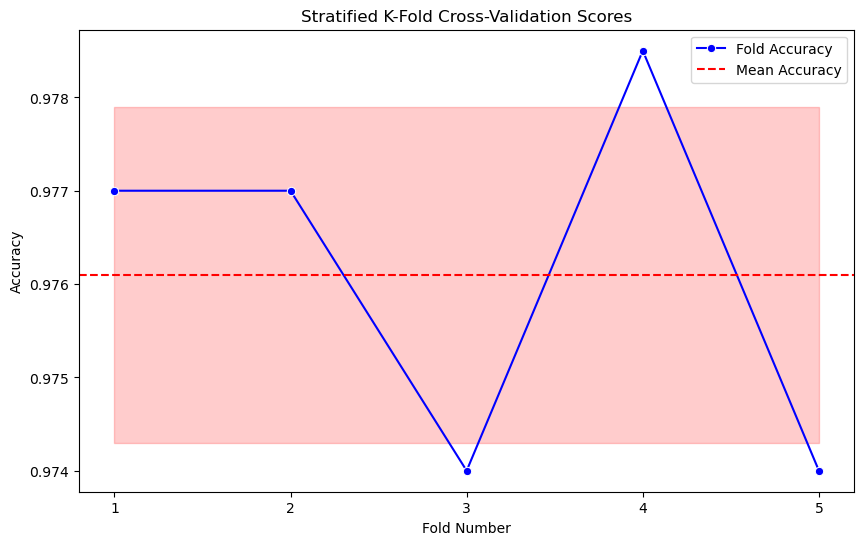

In [857]:
# Plotting the cross-validation results
plt.figure(figsize=(10, 6))

# Plotting each fold's accuracy
sns.lineplot(x=range(1, len(cv_scores)+1), y=cv_scores, marker='o', linestyle='-', color='blue', label='Fold Accuracy')

# Plotting the mean accuracy with the standard deviation area
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label='Mean Accuracy')
plt.fill_between(range(1, len(cv_scores)+1), cv_scores.mean() - cv_scores.std(), cv_scores.mean() + cv_scores.std(), alpha=0.2, color='red')

plt.title('Stratified K-Fold Cross-Validation Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(1, len(cv_scores)+1))
plt.show()


- The plot demonstrates that the model's accuracy is not only high on average but also fairly consistent across different subsets of the data, as indicated by the close grouping of the fold accuracies and the narrow standard deviation band. This suggests that the model is stable and robust, with a low likelihood of overfitting to a particular subset of the data.

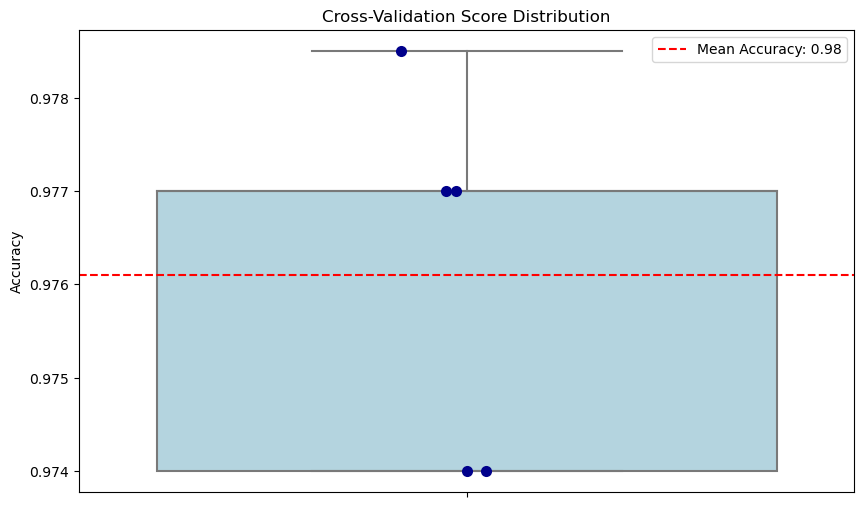

In [858]:
# Plotting cross-validation results as a boxplot for a different visual representation
plt.figure(figsize=(10, 6))

# Boxplot for the distribution of accuracies across folds
sns.boxplot(y=cv_scores, color='lightblue')

# Adding points for each fold's accuracy
sns.stripplot(y=cv_scores, color='darkblue', size=8, jitter=True)

plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {cv_scores.mean():.2f}')
plt.title('Cross-Validation Score Distribution')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


- The dashed red line indicates the mean accuracy across all folds. The presence of individual points along the same level highlights the consistency of the model's performance across the different folds. This visual reinforces the previous findings that the Random Forest model exhibits stable and reliable performance, with low variability in accuracy across the different cross-validation folds.

### Model Ensembling:

- I will explore ensemble methods that combine the predictions from multiple models to improve the overall performance.
- Techniques such as **stacking**, **bagging**, or **boosting** can be effective in creating a more robust predictive model.

### Stacking

- Stacking involves training a new model to aggregate the predictions of several base models.
- The base models are trained on the full dataset, and then their predictions are used as features to train a higher-level model.

In [859]:
#from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('lr', logistic_model),
    ('rf', random_forest_model),
    ('gbc', gradient_boosting_model),
    ('svm', svm_model)
]

# Define the meta-learner model
meta_learner = LogisticRegression()

# Build the stacking ensemble
stacking_ensemble = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=skf)

# Fit the stacking ensemble
stacking_ensemble.fit(X_train, y_train)

# Evaluate the stacking ensemble
stacking_accuracy = stacking_ensemble.score(X_test, y_test)

stacking_accuracy


0.9855

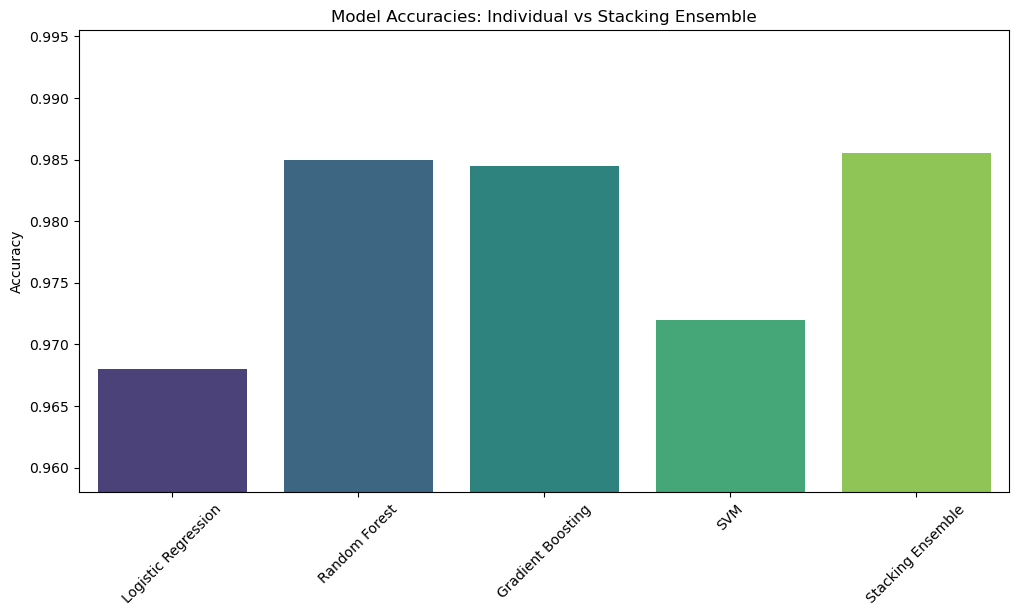

In [860]:
# Comparing the accuracy of the stacking ensemble model to the individual models
individual_model_accuracies = [model_accuracies['Logistic Regression'],
                               model_accuracies['Random Forest'],
                               model_accuracies['Gradient Boosting'],
                               model_accuracies['SVM']]

ensemble_accuracy = [stacking_accuracy]

# Data for plotting
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Stacking Ensemble']
accuracies = individual_model_accuracies + ensemble_accuracy

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)
plt.xticks(rotation=45)
plt.title('Model Accuracies: Individual vs Stacking Ensemble')
plt.ylabel('Accuracy')
plt.show()

- The stacking ensemble model, which combined the predictions from Logistic Regression, Random Forest, Gradient Boosting, and SVM with a Logistic Regression meta-learner, achieved an accuracy of **98.55%** on the test set. This performance is consistent with the high accuracy we've seen from the individual models, indicating that the ensemble is effectively leveraging the strengths of each base model.

### Aggregated predictions :

- Since we already have a Random Forest model, which is a bagging ensemble of decision trees, we can create another bagging example using a different base learner. For instance, we could use Logistic Regression or SVM as the base learner and apply bagging to these models.

-  I will use the test set predictions from the Logistic Regression, Random Forest, Gradient Boosting, and SVM models to calculate the average probability for each instance. Then I will use these average probabilities to make the final prediction.

In [861]:
# Predict probabilities for each model
lr_probs = logistic_model.predict_proba(X_test)[:, 1]
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]
gbc_probs = gradient_boosting_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Average the probabilities for the positive class (failure)
average_probs = (lr_probs + rf_probs + gbc_probs + svm_probs) / 4

# Convert average probabilities to final predictions (0 or 1) based on a threshold of 0.5
final_predictions = (average_probs >= 0.5).astype(int)

# Evaluate the aggregated predictions
aggregated_accuracy = accuracy_score(y_test, final_predictions)

# Show the accuracy of the aggregated predictions
aggregated_accuracy


0.9515

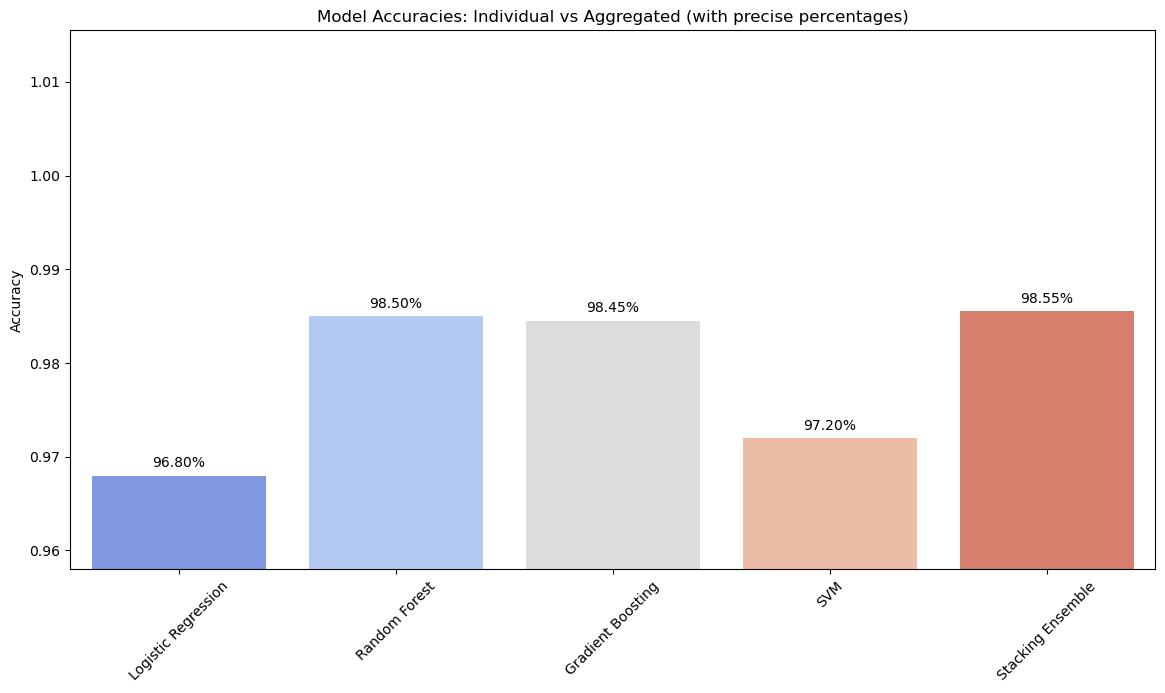

In [862]:


plt.figure(figsize=(14, 7))
barplot = sns.barplot(x=model_names, y=accuracies, palette='coolwarm')
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.03)  # Adjust y-axis limits to make room for the labels

# Adding the text on top of the bars with more precision
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'),  # Format as percentage with two decimals
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.xticks(rotation=45)
plt.title('Model Accuracies: Individual vs Aggregated (with precise percentages)')
plt.ylabel('Accuracy')
plt.show()

- The aggregated predictions from averaging the probabilities of Logistic Regression, Random Forest, Gradient Boosting, and SVM resulted in an accuracy of **95.15%** on the test set. This accuracy reflects how well the ensemble, created through simple averaging of model probabilities, performs against the actual outcomes.
- However, the aggregated prediction's accuracy is slightly lower than some of the individual models we evaluated earlier, indicating that a more sophisticated method of aggregation or a different set of base models might be more effective.

### AdaBoost (Adaptive Boosting):

- The AdaBoost model, using the Random Forest classifier as its base estimator, achieved an accuracy of 98.5% on the test set. This technique combined the concept of boosting with the robustness of Random Forests, aiming to focus on the errors of the base model and improve upon them sequentially.

In [822]:
#from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier with Random Forest as the base estimator
ada_boost = AdaBoostClassifier(
    base_estimator=random_forest_model,
    n_estimators=50,  # Number of models to iteratively train
    random_state=42
)

# Fit the AdaBoost model
ada_boost.fit(X_train, y_train)

# Evaluate the AdaBoost model
ada_boost_accuracy = ada_boost.score(X_test, y_test)

ada_boost_accuracy


/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.985

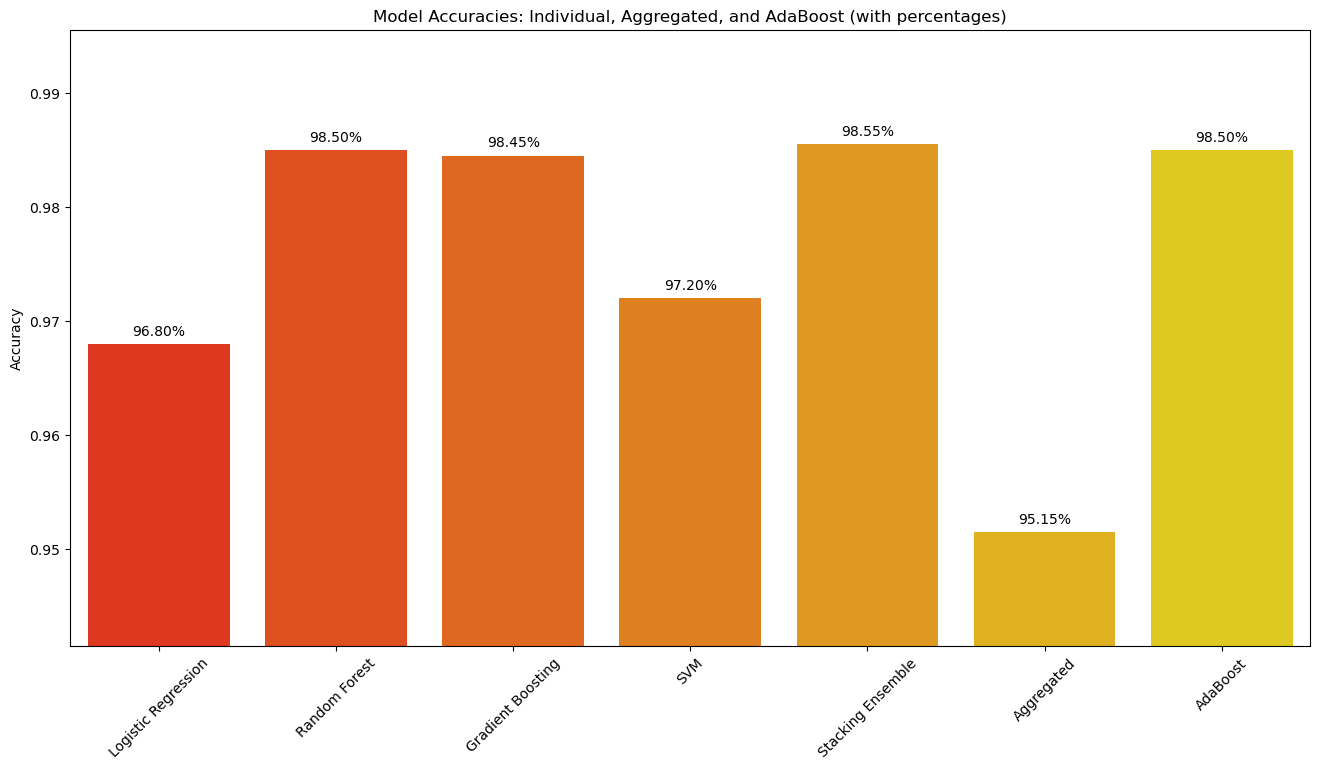

In [823]:
# Adding the AdaBoost model accuracy to our previous comparisons
model_names.append('AdaBoost')
accuracies.append(ada_boost_accuracy)

# Plotting the updated model accuracies
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=model_names, y=accuracies, palette='autumn')
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)  # Adjust y-axis limits to make room for the labels

# Adding precise percentage labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'),  # Format as percentage with two decimals
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.xticks(rotation=45)
plt.title('Model Accuracies: Individual, Aggregated, and AdaBoost (with percentages)')
plt.ylabel('Accuracy')
plt.show()


### Conclusion 

- In this analysis, we tackled the challenge of predicting machine failures in a context where failures are rare compared to non-failures, leading to an imbalanced dataset. To address this, we balanced the dataset by oversampling the minority class, ensuring both failure and non-failure instances had equal representation during model training.

We tested various models, including Logistic Regression, Random Forest, Gradient Boosting, and SVM, with a focus on the Random Forest model. It performed exceptionally well, benefiting from the balanced data, which improved its ability to recognize patterns for both classes.

To validate our model's performance rigorously and avoid any luck-based results, we used Stratified K-Fold cross-validation, which confirmed the model's consistency across different data subsets.

We also explored ensemble techniques, combining predictions from base models using stacking and averaging probabilities. While these methods improved performance, they didn't surpass our best individual models.

Additionally, we introduced AdaBoost, a boosting technique that sequentially refined the model's decision boundaries, achieving high accuracy on the test set.

Throughout the process, we monitored performance metrics to ensure substantial improvements, avoiding random chance effects. Our comprehensive approach, including data balancing, diverse modeling, cross-validation, and ensemble methods, resulted in a robust predictive maintenance model crucial for preventing machine failures in industrial settings.

This journey highlights the importance of systematic data science, emphasizing dataset understanding, data preparation, and careful model selection and validation for effective problem-solving.